<pre>In column Normalization: We want to all our datapoints should lie between 0 to 1.

In column Standardization: We want mean of each column should = 0
                                    std of each column should = 1
                                 
Notice: Here we are not changing the distribution of each column. Our column values can have any distribution.
We just want mean of column values = 0
and std of column values = 1
</pre>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('sample_matrix.xlsx')
data

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


<pre>OK so following the notation. We have a dataset with 5 features. We have total 19 datapoints.
d = 5
n = 19
f1  = sl
f2 = sw
f3 = pl
f4 = pw
f5 = species

we have 19 x 5 matrix.
</pre>

In [3]:
col1 = data['sl']
col1

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
Name: sl, dtype: float64

In [4]:
col1.mean()

5.031578947368421

In [5]:
col1.std()

0.4384982346080609

In [6]:
# For column standardization we need mean() and std() of each column.

def col_standard(column):
    c_mean = column.mean()
    c_std = column.std()
    col_s = []
    
    for value in column:
        col_s.append( ((value - c_mean) / c_std) )   # formula for normalization
    
    return col_s

In [7]:
col_standard(col1)

[0.15603495574556905,
 -0.30006722258763124,
 -0.7561694009208335,
 -0.9842204900874356,
 -0.07201613342103108,
 0.8401882232453735,
 -0.9842204900874356,
 -0.07201613342103108,
 -1.4403226684206358,
 -0.30006722258763124,
 0.8401882232453735,
 -0.5281183117542334,
 -0.5281183117542334,
 -1.6683737575872382,
 1.752392579911776,
 1.524341490745176,
 0.8401882232453735,
 0.15603495574556905,
 1.524341490745176]

In [8]:
standard_matrix = pd.DataFrame(list(zip( col_standard(data['sl']), 
                                         col_standard(data['sw']), 
                                         col_standard(data['pl']), 
                                         col_standard(data['pw']),
                                         data['species'] )), 
                            columns =['sl_dash', "sw_dash", "pl_dash", "pw_dash", "spe"])
standard_matrix

,sl_dash,sw_dash,pl_dash,pw_dash,spe
0,0.156035,0.089587,-0.211560,-0.333849,setosa
1,-0.300067,-1.126232,-0.211560,-0.333849,setosa
2,-0.756169,-0.639905,-0.881499,-0.333849,setosa
3,-0.984220,-0.883069,0.458380,-0.333849,setosa
4,-0.072016,0.332750,-0.211560,-0.333849,setosa
5,0.840188,1.062242,1.798259,1.780528,setosa
6,-0.984220,-0.153577,-0.211560,0.723339,setosa
7,-0.072016,-0.153577,0.458380,-0.333849,setosa
8,-1.440323,-1.369396,-0.211560,-0.333849,setosa
9,-0.300067,-0.883069,0.458380,-1.391037,setosa


In [9]:
# df = pd.DataFrame(list(zip(lst, lst2)), 
#              columns =['Name', 'val'])

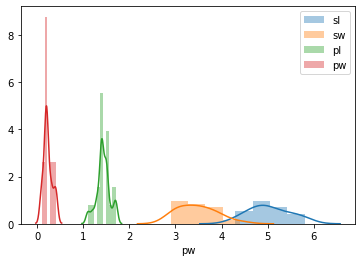

In [10]:
# original Data
sns.distplot( data["sl"] , label="sl")
sns.distplot( data["sw"] , label="sw")
sns.distplot( data["pl"] , label="pl")
sns.distplot( data["pw"] , label="pw")
plt.legend()

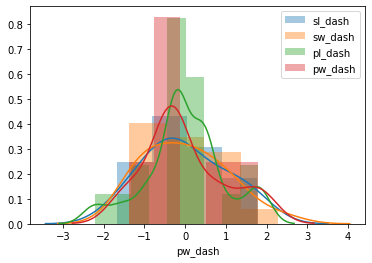

In [11]:
# column standardized Data
sns.distplot( standard_matrix["sl_dash"] , label="sl_dash")
sns.distplot( standard_matrix["sw_dash"] , label="sw_dash")
sns.distplot( standard_matrix["pl_dash"] , label="pl_dash")
sns.distplot( standard_matrix["pw_dash"] , label="pw_dash")
plt.legend()

In [13]:
print(standard_matrix["sl_dash"].mean())
print(standard_matrix["sl_dash"].std())

8.531187452382782e-16
1.0


In [14]:
print(standard_matrix["sw_dash"].mean())
print(standard_matrix["sw_dash"].std())

8.414321870843291e-16
1.0


In [15]:
print(standard_matrix["pw_dash"].mean())
print(standard_matrix["pw_dash"].std())

-1.8698493046318425e-16
1.0000000000000002


In [16]:
print(standard_matrix["pl_dash"].mean())
print(standard_matrix["pl_dash"].std())

-2.5710427938687837e-16
1.0
